In [8]:
import tensorflow as tf
import gradio as gr

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255.0
x_test= x_test/255.0


In [11]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

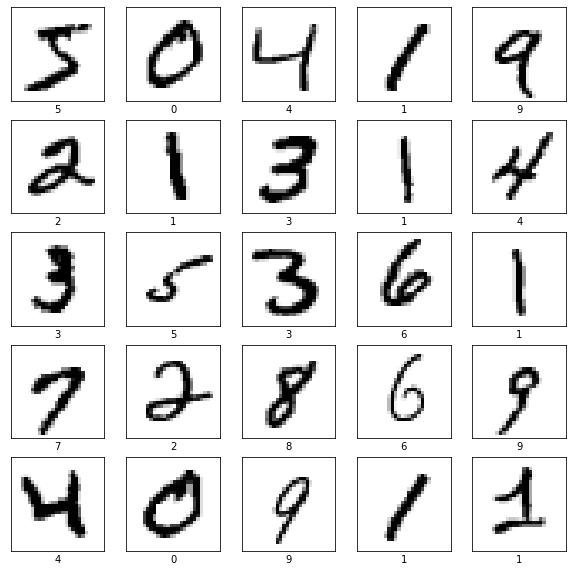

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dense(10, activation= 'softmax')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2524 - accuracy: 0.9277 - val_loss: 0.1366 - val_accuracy: 0.9581
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1096 - accuracy: 0.9679 - val_loss: 0.0971 - val_accuracy: 0.9717
Epoch 3/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0743 - accuracy: 0.9776 - val_loss: 0.0784 - val_accuracy: 0.9751
Epoch 4/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0556 - accuracy: 0.9825 - val_loss: 0.0805 - val_accuracy: 0.9759
Epoch 5/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0437 - accuracy: 0.9860 - val_loss: 0.0754 - val_accuracy: 0.9765
Epoch 6/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0324 - accuracy: 0.9903 - val_loss: 0.0750 - val_accuracy: 0.9798
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0275 - accuracy: 0.9915 - val_loss: 0.0756 - val_accuracy:

In [3]:
def classify(image):
    prediction = model.predict(image).tolist()[0]
    return {str(i): prediction[i] for i in range (10)}
sketchpad = gr.inputs.Sketchpad()
label = gr.outputs.Label(num_top_classes = 3)
interface = gr.Interface(classify, sketchpad, 
                         label, live = True, capture_session= True)

In [4]:
interface.launch()

Running locally at: http://127.0.0.1:7860/


(<gradio.networking.serve_files_in_background.<locals>.HTTPServer at 0x1f201081400>,
 'http://127.0.0.1:7860/',
 None)

# Make predictions


In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(x_test)

In [19]:
predictions[0]

array([0.08533674, 0.08533674, 0.08533674, 0.08533679, 0.08533674,
       0.08533674, 0.08533674, 0.23196921, 0.08533674, 0.08533674],
      dtype=float32)

In [20]:
np.argmax(predictions[0])

7

In [21]:
y_test[0]

7

# Graph this to look at the full set of 10 class predictions.

In [22]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

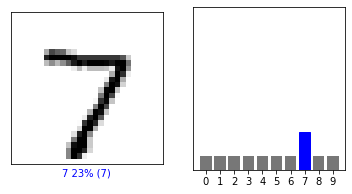

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

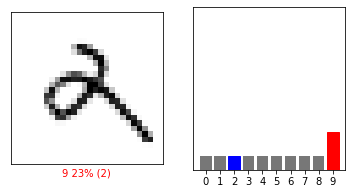

In [32]:
i = 149
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

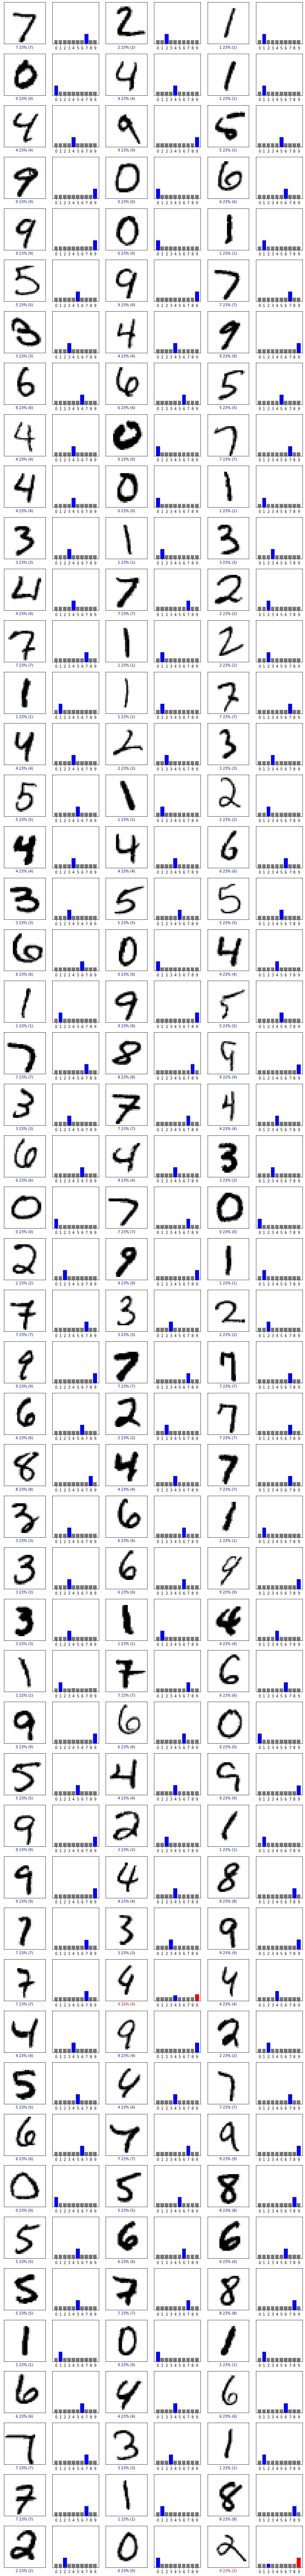

In [30]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 50
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()